In [13]:
import pandas as pd
import json
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('data/main-processed.tsv', sep='\t')

In [28]:
df['gender'].replace("Other", np.nan, inplace=True)
df['gender'].replace("Non-binary", np.nan, inplace=True)
df['gender'].value_counts(dropna=False)

Male      37654
NaN       22070
Female     5605
Name: gender, dtype: int64

In [12]:
df[df['country'] == 'United States'].groupby('gender')['tc'].mean()

gender
Female        195294.513433
Male          216718.571898
Non-binary    218375.035019
Other         134500.000000
Name: tc, dtype: float64

In [16]:
df = df[df['country'] == 'United States']

<AxesSubplot:xlabel='gender,yoe_total'>

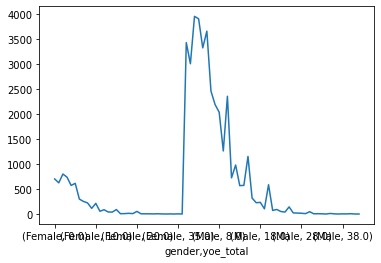

In [29]:
df.groupby(['gender', 'yoe_total'])['company'].count().plot()

<AxesSubplot:xlabel='yoe_total', ylabel='tc'>

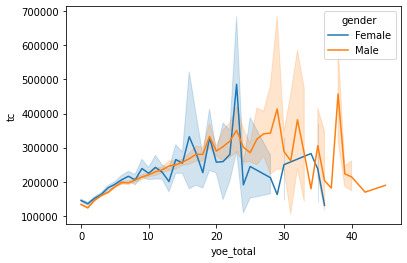

In [30]:
sns.lineplot(data=df, x='yoe_total', y='tc', hue='gender')